Скачайте материалы к занятию.

Проанализируйте ряды и сделайте их стационарными.

Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [173]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

Подготовим функции, которые будут использоваться в этой работе

In [267]:
def test_stationarity(timeseries):
    
    """
    функция, которая выводит основные статистики, включая проверку Дики-Фулера на станционарность ряда через p-value
    
    """
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    


def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    """ 
    
    Тест позволяет вывести оригинальный ряд, ряд с частичной автокорреляцией  
    
    """
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return


def difference(ts, lag):
    """
    Функция для дифференцирования временного ряда с заданным лагом
    
    """
    return np.diff(ts, n=lag)


def adf_p_value(ts):
    """
    Функция для вычисления p-value для теста Дики-Фуллера
    
    """
    result = adfuller(ts, autolag='AIC')
    return result[1]

In [175]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

Построим графики временных рядов из словаря all_series.

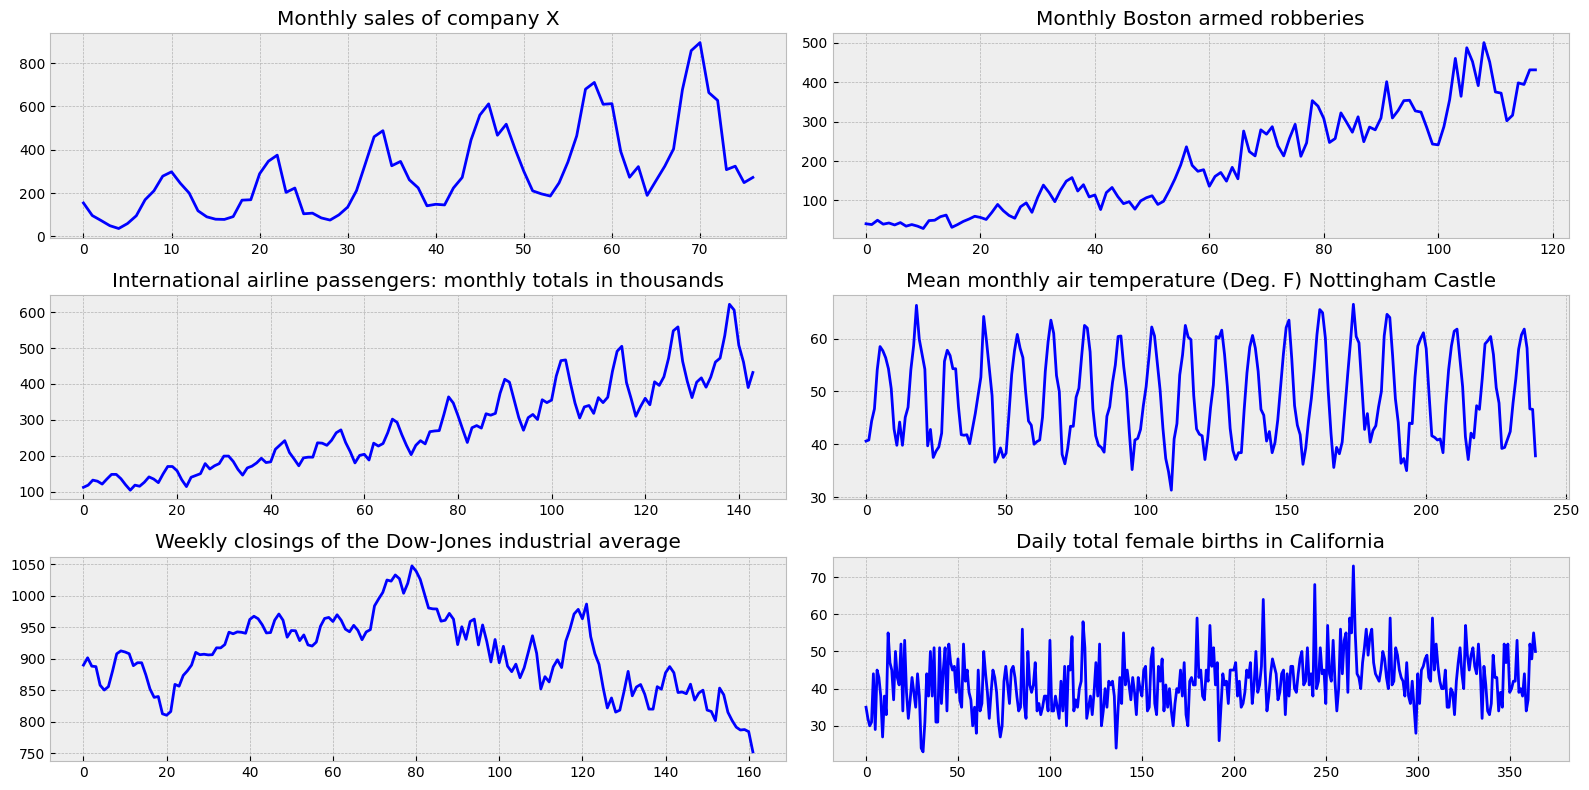

In [218]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    # Задаю кол-во row и col для сетки, в которой будут расположены графики. Устанавливаю 3 строки и 2 столбца.     
    layout = (3, 2)
    # Перебираю все ключи из словаря.  i - индекс текущего ключа, key - наименование ключа.     
    for i, key in enumerate(all_series.keys()):
        # Определяю координаты тек.графика в сетке. Где, х - задает столбец, а y - задает строку.         
        x = i % 2
        y = int((i - x) / 2)
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# 1. Monthly sales of company 

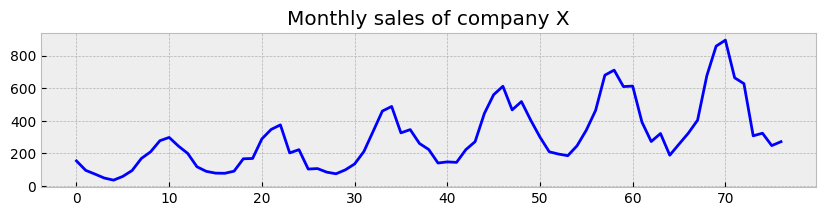

In [275]:
series_sales_of_company = all_series['Monthly sales of company X']

with plt.style.context('bmh'):
        plt.figure(figsize=(10, 2))
        plt.plot(series_sales_of_company, color='blue')
        plt.title('Monthly sales of company X')

Преобразование Бокса-Кокса 

Используем для выравнивания дисперссии на всем временном ряде

In [159]:
# Попробуем устранить дисперсию с прмощью преобразования Бокса-Кокса
series = boxcox(series_sales_of_company, 0)
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Дифференцирование ряда

In [178]:
# Определим оптимальный лаг, при котором p-value в тесте Дики-Фулера минимальный.

min_p_value = float('inf')
best_lag = None

# Вычисляю разности временного ряда для каждого лага от 1 до 12, а затем применяю тест Дики-Фуллера
# к каждому дифференцированному временному ряду. Выбираю такой лаг, при котором получается минимальное значение p-value.

for lag in range(1, 13):
    diff_ts = difference(series, lag)
    p_value = adf_p_value(diff_ts)
    
    if p_value < min_p_value:
        min_p_value = p_value
        best_lag = lag

print(f"Оптимальный лаг: {best_lag}, соответствующее p-value: {min_p_value}")

Оптимальный лаг: 9, соответствующее p-value: 4.0856330986448916e-18


Results of Dickey-Fuller Test:
Test Statistic                -1.026737e+01
p-value                        4.085633e-18
#Lags Used                     1.100000e+01
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64


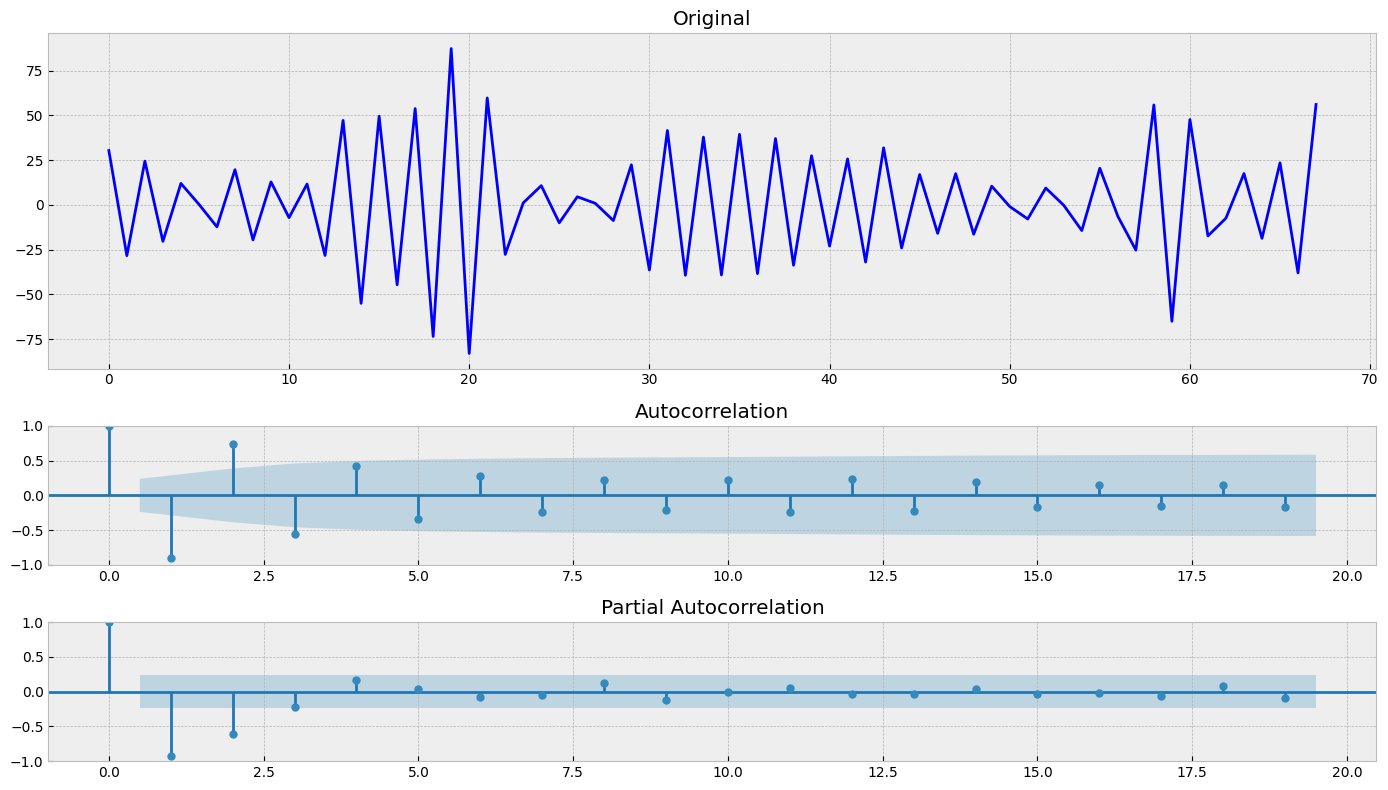

In [179]:
diff_series_9 = difference(series, lag=9)
tsplot(diff_series_9)

# 2. Monthly Boston armed robberies

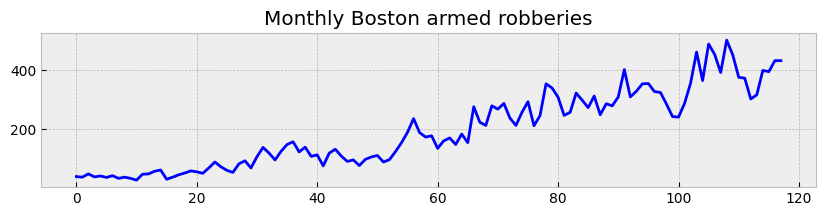

In [195]:
series_sales_of_company = all_series['Monthly Boston armed robberies']

with plt.style.context('bmh'):
        plt.figure(figsize=(10, 2))
        plt.plot(series_sales_of_company, color='blue')
        plt.title('Monthly Boston armed robberies')

In [184]:
# Преобразование Бокс-Кокса
series = boxcox(series_Boston_armed_robberies, 0)

In [185]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


Определяю оптимальный лаг для дифференцирования ряда

In [186]:
min_p_value = float('inf')
best_lag = None

for lag in range(1, 13):
    diff_ts = difference(series, lag)
    p_value = adf_p_value(diff_ts)
    
    if p_value < min_p_value:
        min_p_value = p_value
        best_lag = lag

print(f"Оптимальный лаг: {best_lag}, соответствующее p-value: {min_p_value}")

Оптимальный лаг: 12, соответствующее p-value: 1.5774405660045656e-20


Results of Dickey-Fuller Test:
Test Statistic                -1.126618e+01
p-value                        1.577441e-20
#Lags Used                     1.300000e+01
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


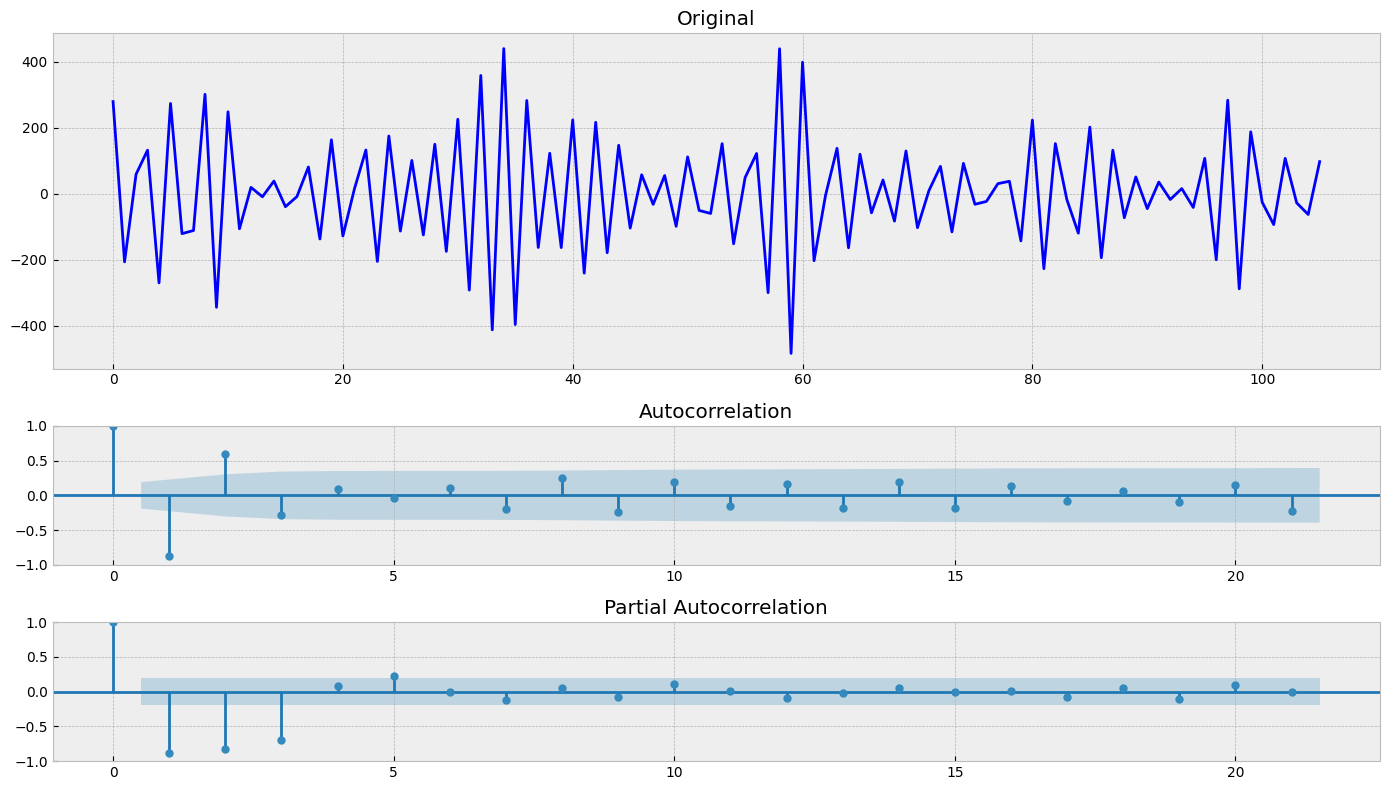

In [187]:
diff_series_12 = difference(series, 12)

tsplot(diff_series_12)

# 3. International airline passengers

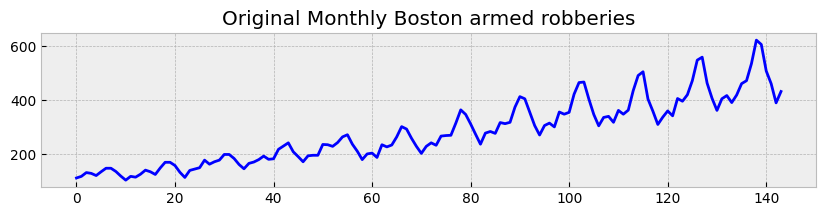

In [280]:
series_air_line = all_series['International airline passengers: monthly totals in thousands']

with plt.style.context('bmh'):
        plt.figure(figsize=(10, 2))
        plt.plot(series_air_line, color='blue')
        plt.title('Original Monthly Boston armed robberies')

In [197]:
ts = boxcox(series_air_line, 0)

In [198]:
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [199]:
# Перебор лагов и выбор минимального p-value
for lag in range(1, 13):
    diff_ts = difference(ts, lag)
    p_value = adf_p_value(diff_ts)
    
    if p_value < min_p_value:
        min_p_value = p_value
        best_lag = lag

print(f"Оптимальный лаг: {best_lag}, соответствующее p-value: {min_p_value}")

Оптимальный лаг: 12, соответствующее p-value: 5.644460840574512e-29


In [200]:
diff_series_12 = difference(ts, 12)

Results of Dickey-Fuller Test:
Test Statistic                -1.606060e+01
p-value                        5.644461e-29
#Lags Used                     1.300000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64


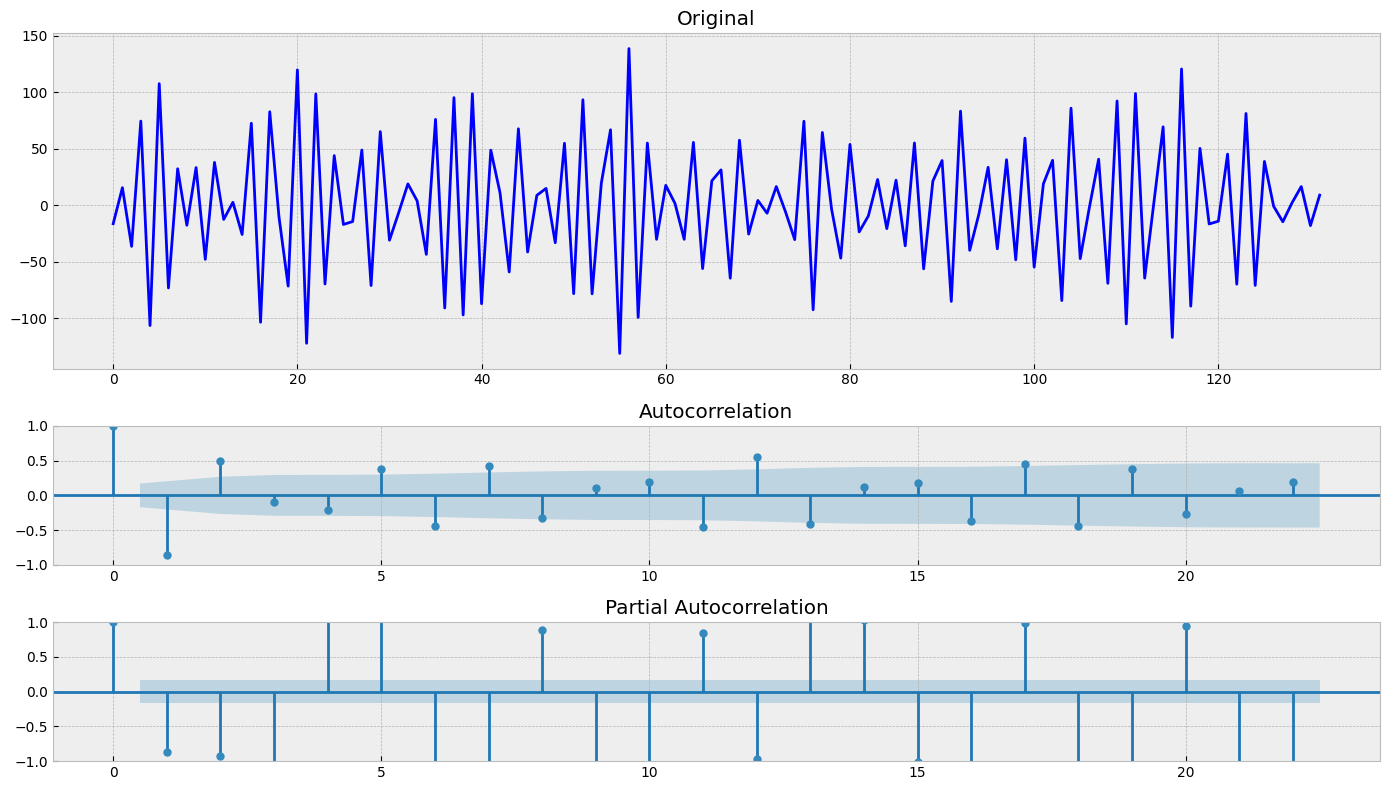

In [201]:
tsplot(diff_series_12)

In [ ]:
 "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
        
series_air_line = all_series['Mean monthly air temperature (Deg. F) Nottingham Castle']

with plt.style.context('bmh'):
        plt.figure(figsize=(10, 2))`b
        plt.plot(series_air_line, color='blue')b
        plt.title('Original Monthly Boston armed robberies')b

# 4. Mean monthly air temperature (Deg. F) Nottingham Castle

In [202]:
series_air_temperature = all_series['Mean monthly air temperature (Deg. F) Nottingham Castle']

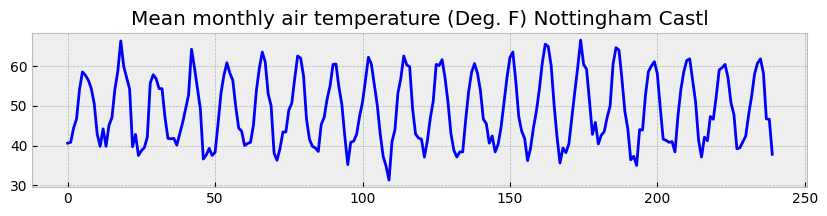

In [204]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 2))
    plt.plot(series_air_temperature, color='blue')
    plt.title('Mean monthly air temperature (Deg. F) Nottingham Castl')

В данном случае не вижу необходмости выравнивать дисперсию, можно сразу произвести дифференцирование ряда

In [221]:
# Перебор лагов и выбор минимального p-value
for lag in range(1, 13):
    diff_ts = difference(series_air_temperature, lag)
    p_value = adf_p_value(diff_ts)
    
    if p_value < min_p_value:
        min_p_value = p_value
        best_lag = lag

print(f"Оптимальный лаг: {best_lag}, соответствующее p-value: {min_p_value}")

Оптимальный лаг: 11, соответствующее p-value: 1.3756746245331225e-29


In [222]:
diff_series_11 = difference(series_air_temperature, 11)

Results of Dickey-Fuller Test:
Test Statistic                -1.673398e+01
p-value                        1.375675e-29
#Lags Used                     1.500000e+01
Number of Observations Used    2.130000e+02
Critical Value (1%)           -3.461429e+00
Critical Value (5%)           -2.875207e+00
Critical Value (10%)          -2.574054e+00
dtype: float64


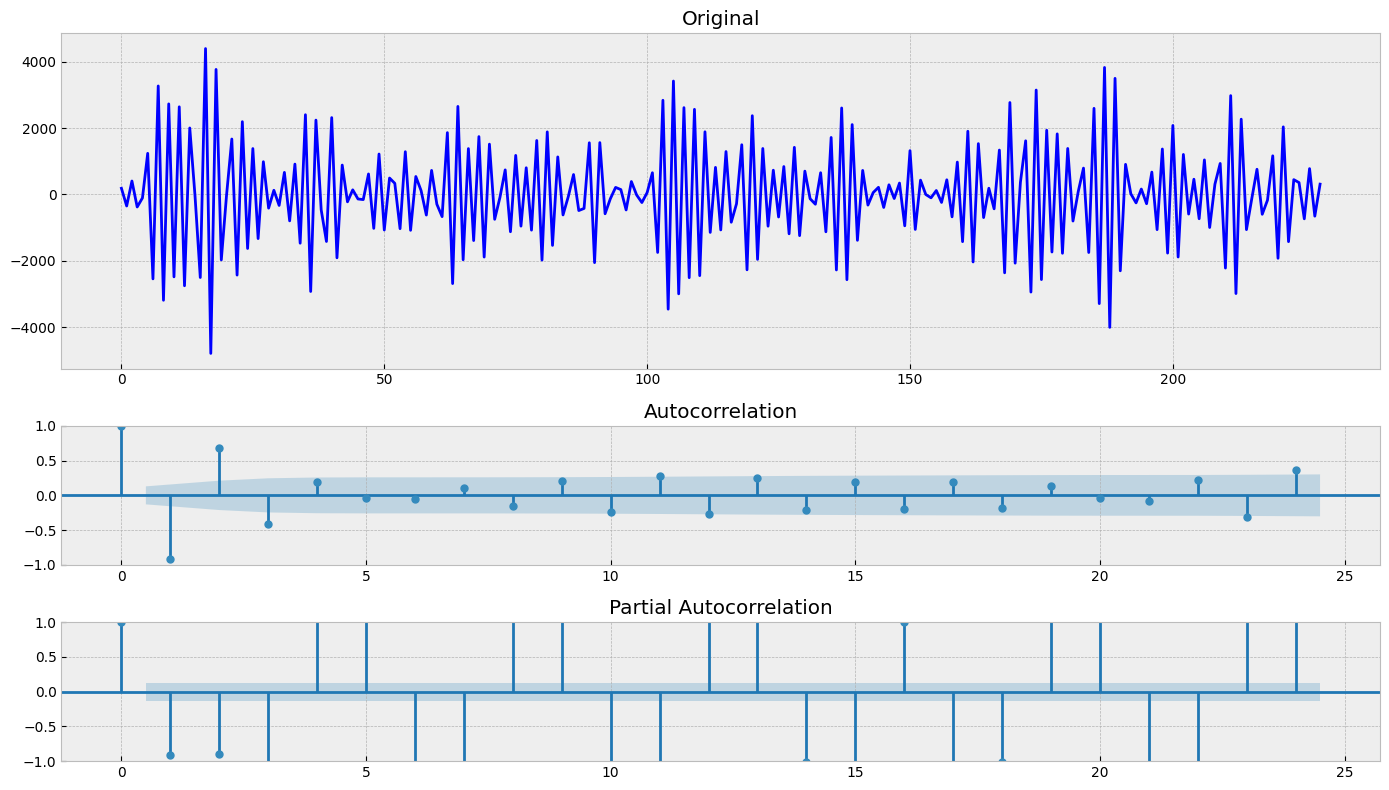

In [223]:
tsplot(diff_series_11)

# 5. Weekly closings of the Dow-Jones industrial average

In [259]:
series_closings_Dow_jones = all_series['Weekly closings of the Dow-Jones industrial average']

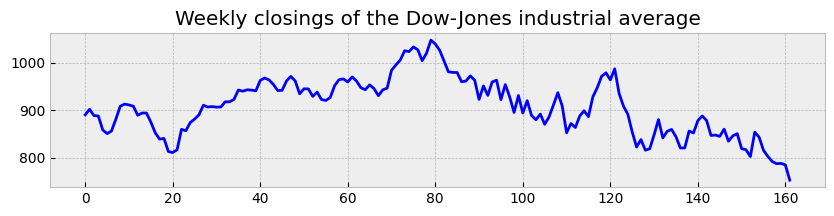

In [260]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 2))
    plt.plot(series_closings_Dow_jones, color='blue')
    plt.title('Weekly closings of the Dow-Jones industrial average')

In [261]:
ts = boxcox(series_closings_Dow_jones, 0)

In [262]:
# Тест Дики-Фулера:
print(f'Тест Дики-Фулера на станционарность ряда, p-value: {adfuller(ts, autolag="AIC")[1]:.2f}')

Тест Дики-Фулера на станционарность ряда, p-value: 0.67


Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


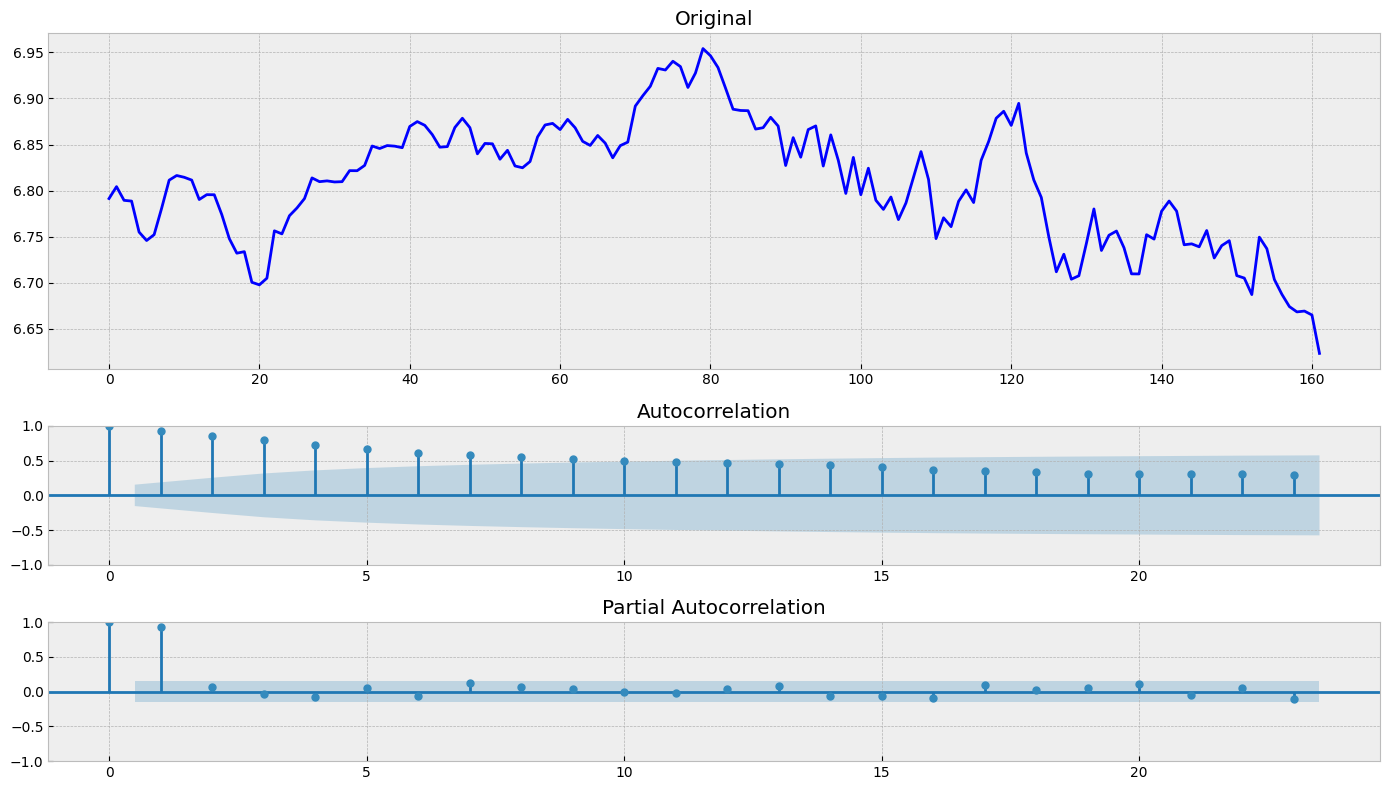

In [263]:
tsplot(ts)

In [268]:
# Перебор лагов и выбор минимального p-value
for lag in range(1, 13):
    diff_ts = difference(ts, lag)
    p_value = adf_p_value(diff_ts)
    
    if p_value < min_p_value:
        min_p_value = p_value
        best_lag = lag

print(f"Оптимальный лаг: {best_lag}, соответствующее p-value: {min_p_value}")

Оптимальный лаг: 11, соответствующее p-value: 1.3756746245331225e-29


In [269]:
diff_series_11 = difference(ts, lag=11)

Results of Dickey-Fuller Test:
Test Statistic                -1.174794e+01
p-value                        1.228651e-21
#Lags Used                     1.400000e+01
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


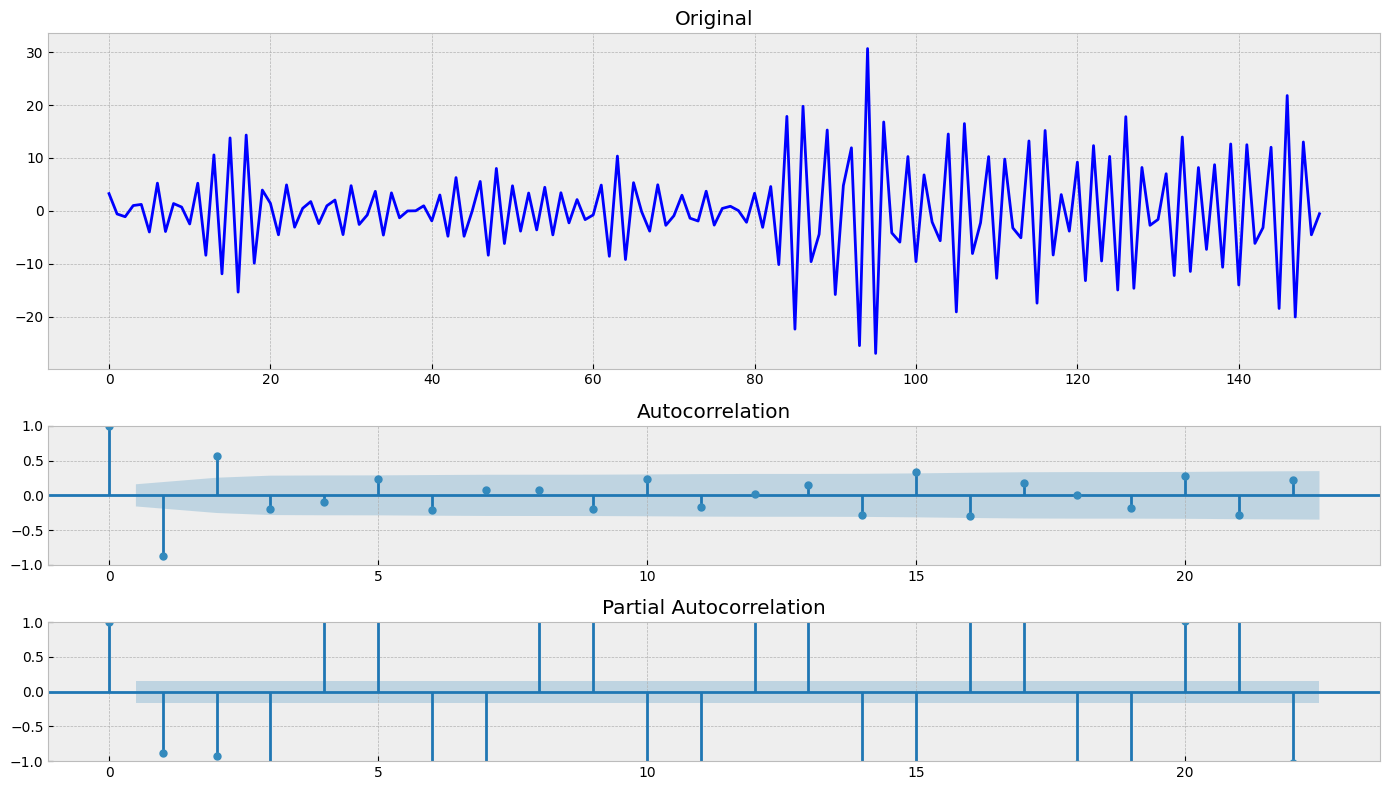

In [270]:
tsplot(diff_series_11)

# 6. Daily total female births in California

In [271]:
series_births_in_California= all_series["Daily total female births in California"]

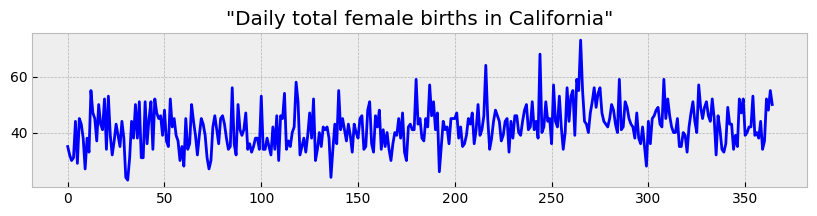

In [272]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 2))
    plt.plot(series_births_in_California, color='blue')
    plt.title('"Daily total female births in California"')

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


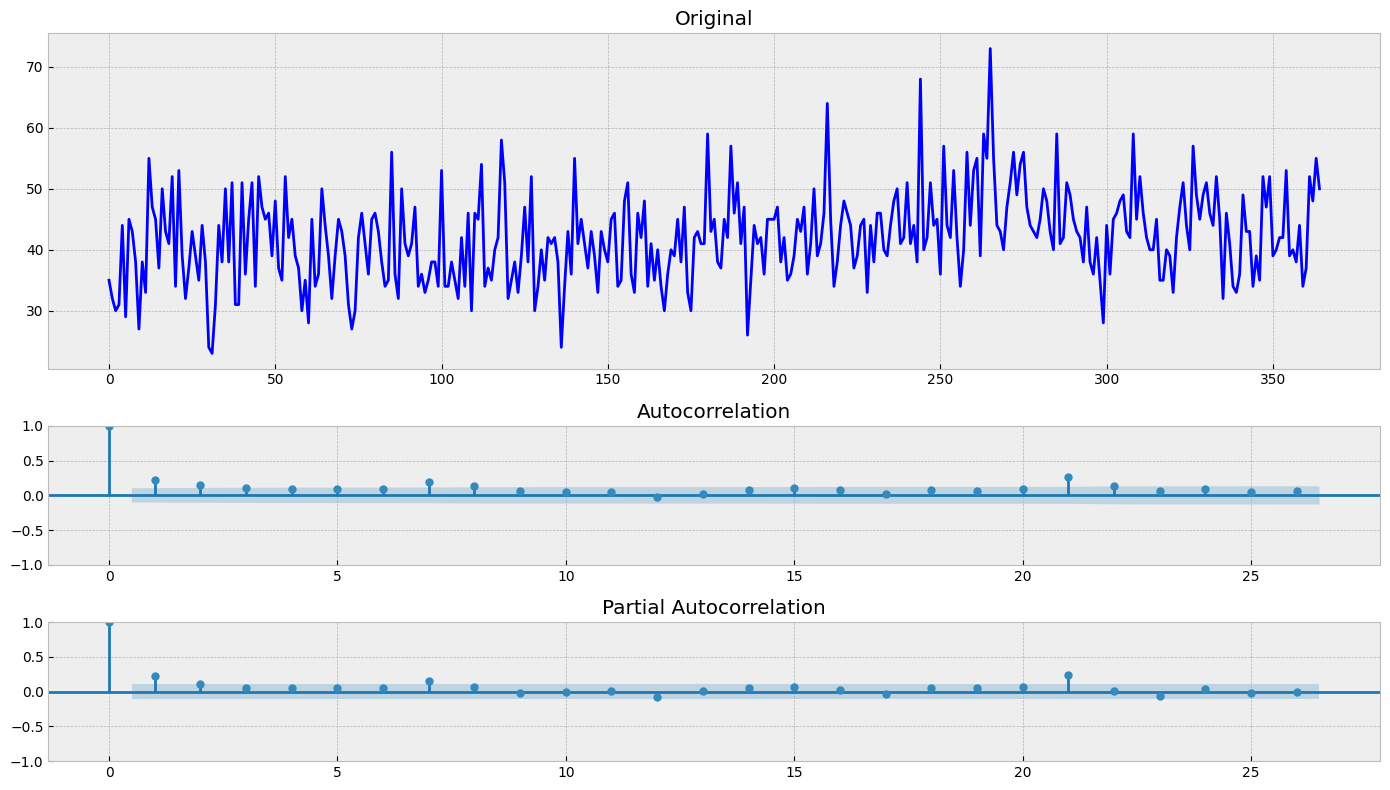

In [273]:
tsplot(series_births_in_California)

Ряд уже является стационарным и не требует никаких преобразований :) 